In [55]:
import pandas as pd
import seaborn as sns
import numpy as np

In [56]:
df = pd.read_csv("reviews.csv") 

In [57]:
df.shape

(1000, 2)

In [58]:
df.head()

,Description,Is_Response
0,The room was kind of clean but had a VERY stro...,not happy
1,I stayed at the Crown Plaza April -- - April -...,not happy
2,I booked this hotel through Hotwire at the low...,not happy
3,Stayed here with husband and sons on the way t...,happy
4,My girlfriends and I stayed here to celebrate ...,not happy


In [59]:
# Remove all rows with null values
df.dropna(axis=0, inplace=True)

In [60]:
# Change Is_Response to 0 for no happy and 1 for happy
df['Is_Response'].replace(['happy','not happy'],[1,0], inplace=True)

In [61]:
df.head()

,Description,Is_Response
0,The room was kind of clean but had a VERY stro...,0
1,I stayed at the Crown Plaza April -- - April -...,0
2,I booked this hotel through Hotwire at the low...,0
3,Stayed here with husband and sons on the way t...,1
4,My girlfriends and I stayed here to celebrate ...,0


In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

In [63]:
X = df['Description']
y = df['Is_Response']

In [64]:
# tf-idf means term-frequency times inverse document-frequency. 
tfidf = TfidfVectorizer()
features = tfidf.fit_transform(X).toarray()

In [65]:
features.shape

(1000, 8493)

In [66]:
type(features)

numpy.ndarray

In [67]:
features[:5,:10]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.11095847],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.04222343],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.03765756],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.03208172]])

In [68]:
X_train, X_test, y_train, y_test = train_test_split(features,y,test_size=0.2,random_state=20)

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [70]:
clf = LogisticRegression().fit(X_train,y_train)
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
### Train accuracy
clf.score(X_train,y_train)

0.88875

In [72]:
y_pred = clf.predict(X_test)
print("Accuracy Score:",clf.score(X_test,y_test))  

Accuracy Score: 0.795


In [73]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[ 30  40]
 [  1 129]]


Text(0.5, 15.0, 'Predicted')

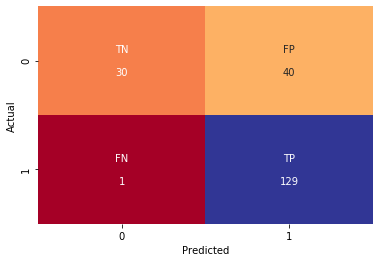

In [74]:
group_counts = [f"{value:0.0f}" for value in  cm.flatten()]
group_names = ['TN','FP', 'FN','TP']
labels = [f"{v1}\n\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.array(labels).reshape(2,2)
ax = sns.heatmap(cm, annot=labels, fmt="", cmap='RdYlBu',cbar=False)
ax.set_ylabel("Actual")
ax.set_xlabel("Predicted")

### Predict for new data

In [76]:
# Predict whether the given review is positive or negative 
r1 = "This is very good"
#clf.predict(X)

## Text classification using BernoulliNB

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

In [45]:
cv = CountVectorizer()
features = cv.fit_transform(X)

In [46]:
features.shape

(1000, 8493)

In [29]:
features.toarray()[:5,:20]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int64)

In [49]:
# tf-idf means term-frequency times inverse document-frequency. 
tfidf = TfidfVectorizer()
features = tfidf.fit_transform(X).toarray()

In [50]:
X_train, X_test, y_train, y_test = train_test_split(features,y,test_size=0.2,random_state=20)

In [51]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB().fit(X_train,y_train)

In [52]:
bnb.score(X_train,y_train)

0.83875

In [53]:
y_pred = bnb.predict(X_test)
print("Accuracy Score:",bnb.score(X_test,y_test))  

Accuracy Score: 0.745


[[ 31  39]
 [ 12 118]]


Text(0.5, 15.0, 'Predicted')

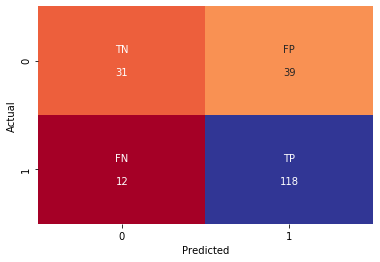

In [54]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
group_counts = [f"{value:0.0f}" for value in  cm.flatten()]
group_names = ['TN','FP', 'FN','TP']
labels = [f"{v1}\n\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.array(labels).reshape(2,2)
ax = sns.heatmap(cm, annot=labels, fmt="", cmap='RdYlBu',cbar=False)
ax.set_ylabel("Actual")
ax.set_xlabel("Predicted")